In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [2]:
sns.set()
a4_dims = (11.7, 8.27)

In [3]:
df = pd.read_csv('project_data/remuneracao_quadros_tecnicos_limpo.csv')

In [4]:
if 'Unnamed: 0' in df:
    df.drop('Unnamed: 0', axis=1,inplace=True)

Text(0.5, 1.0, 'Scatter remuneracao por tempo exercicio')

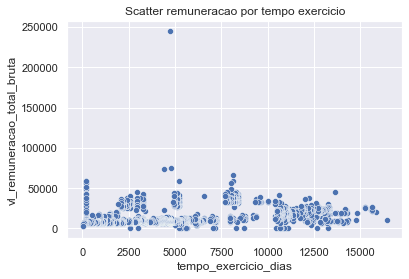

In [5]:
plot = sns.scatterplot(x=df['tempo_exercicio_dias'],
                y=df['vl_remuneracao_total_bruta'])
plot.set_title(label='Scatter remuneracao por tempo exercicio')

In [6]:
df[df['vl_remuneracao_total_bruta']>240000]

,registro_funcional,num_vinculo,dc_cargo_base,grupo_cargo_base,nivel_cargo_base,segmento_cargo_base,referencia_cargo_comissao,relacao_juridica,qt_hora_jornada_semanal,dc_orgao,qtd_servidores_orgao,ano_nascimento,sexo,raca,pessoa_com_deficiencia,vl_remuneracao_base_mensal,vl_outro_elemento_remuneracao,vl_remuneracao_total_bruta,cedido,tempo_exercicio_dias
1591,7766190,1,ANALISTA DE INFORMACOES CULTURA E DESPORTO,QAA,II,BIBLIOTECONOMIA,NaN,EFETIVO,40,SECRETARIA MUNICIPAL DE EDUCACAO,82094.0,1981,M,BRANCA,NAO,7699.76,237744.29,245444.05,False,4735


In [7]:
#removendo outlier por erro de digitação
df.drop(1591, inplace=True)

Text(0.5, 1.0, 'Scatter remuneracao por tempo exercicio')

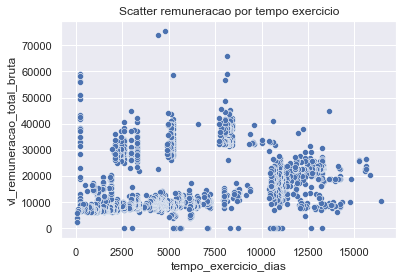

In [8]:
plot = sns.scatterplot(x=df['tempo_exercicio_dias'],
                y=df['vl_remuneracao_total_bruta'])
plot.set_title(label='Scatter remuneracao por tempo exercicio')

In [9]:
def padronizar_z_score(series):
    
    std = series.std(ddof=0)
    mean = series.mean()
    
    return (series-mean)/std

In [10]:
df['tempo_exercicio_dias_padro'] = padronizar_z_score(df['tempo_exercicio_dias'])

In [11]:
df['vl_remuneracao_total_bruta_padro'] = padronizar_z_score(df['vl_remuneracao_total_bruta'])

In [12]:
df_cluster = df[['tempo_exercicio_dias_padro', 'vl_remuneracao_total_bruta_padro']].copy()

In [13]:
hierarchical_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [14]:
hierarchical_cluster.fit(df_cluster)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(10)
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

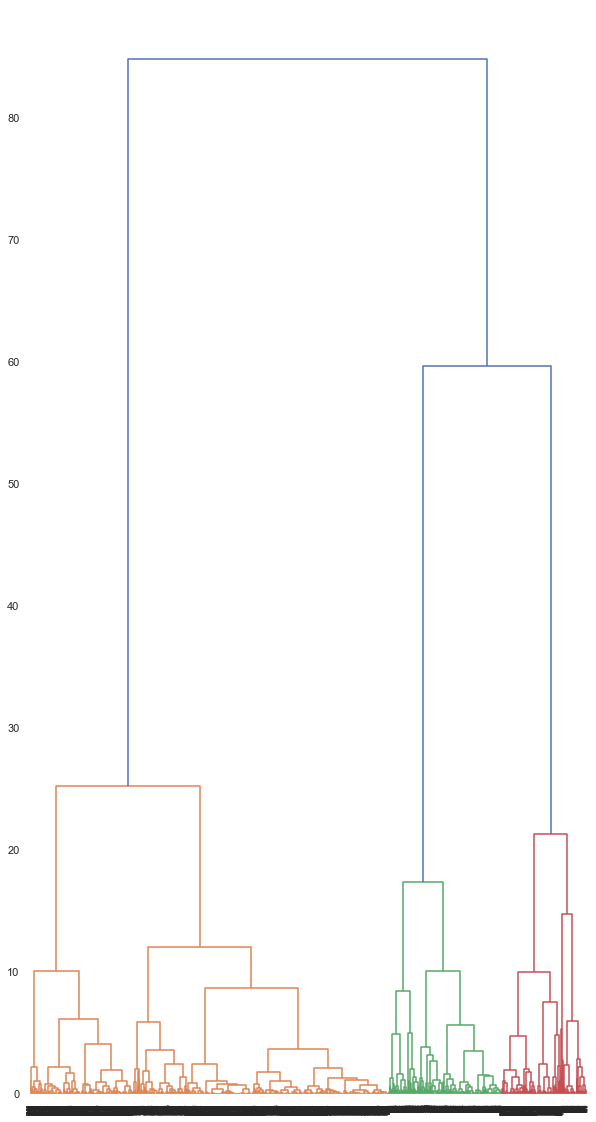

In [16]:
dendograma = plot_dendrogram(hierarchical_cluster)

In [17]:
from sklearn.cluster import KMeans

In [18]:
Ks = list(range(1, 15))+[20,30,50,100]
km = {i:KMeans(n_clusters=i, random_state=42) for i in Ks}
score = {i:km[i].fit(df_cluster).score(df_cluster) for i in km}


/home/h-pgy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

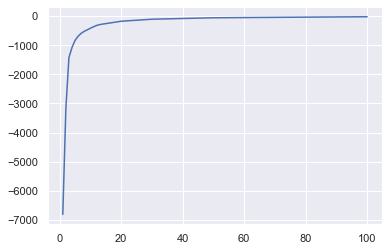

In [19]:
sns.lineplot(score.keys(), score.values())

In [20]:
Ks = list(range(1, 15))
km = {i:KMeans(n_clusters=i, random_state=42) for i in Ks}
score = {i:km[i].fit(df_cluster).score(df_cluster) for i in km}

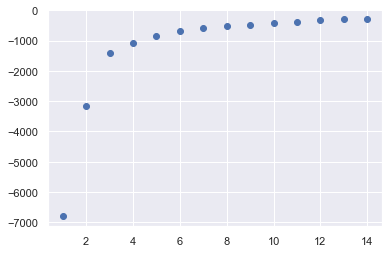

In [21]:
plt.plot(score.keys(), score.values(), 'bo')

In [22]:
df['kmeans_3'] = km[3].labels_

In [23]:
df['kmeans_5'] = km[5].labels_

Text(0.5, 1.0, 'Scatter remuneracao por tempo exercicio')

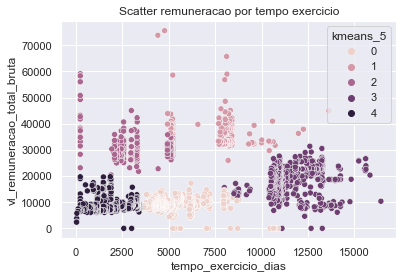

In [24]:
plot = sns.scatterplot(data=df, x='tempo_exercicio_dias',
                y='vl_remuneracao_total_bruta', hue = 'kmeans_5')
plot.set_title(label='Scatter remuneracao por tempo exercicio')

In [25]:
pd.crosstab(df['dc_cargo_base'], df['kmeans_5'])

kmeans_5,0,1,2,3,4
dc_cargo_base,,,,,
ANALISTA,0,0,0,32,0
ANALISTA ASSIST DESENV SOCIAL EQUIP SOCIAL,11,0,2,0,1
ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,383,0,20,101,291
ANALISTA DE INFORMACOES CULTURA E DESPORTO,445,2,3,46,169
ANALISTA DE MEIO AMBIENTE,82,0,0,0,0
ANALISTA DE ORDENAMENTO TERRITORIAL,1,0,0,41,0
ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL,40,0,1,71,90
ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,0,0,0,0,64
ARQUITETO,0,0,0,2,0


Text(0.5, 1.0, 'K-means 3 remuneracao por tempo exercicio')

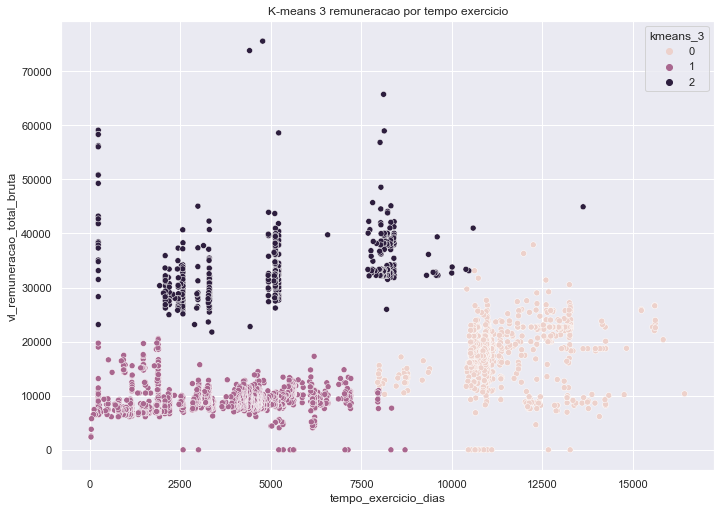

In [26]:
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(data=df, x='tempo_exercicio_dias',
                y='vl_remuneracao_total_bruta', hue = 'kmeans_3')
plot.set_title(label='K-means 3 remuneracao por tempo exercicio')

In [27]:
plot.get_figure().savefig('k_means_remuneracao_tempo_servico.png')

In [28]:
dist_clusters = pd.crosstab(df['dc_cargo_base'], df['kmeans_3']).apply(lambda r: round(r/r.sum(),2)*100, axis=1).rename({0:'% 0',
                                                                                                        1:'% 1',
                                                                                                        2:'% 2'},axis=1)

In [29]:
dist_clusters

kmeans_3,% 0,% 1,% 2
dc_cargo_base,,,
ANALISTA,100.0,0.0,0.0
ANALISTA ASSIST DESENV SOCIAL EQUIP SOCIAL,29.0,57.0,14.0
ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,13.0,85.0,3.0
ANALISTA DE INFORMACOES CULTURA E DESPORTO,7.0,92.0,1.0
ANALISTA DE MEIO AMBIENTE,0.0,100.0,0.0
ANALISTA DE ORDENAMENTO TERRITORIAL,100.0,0.0,0.0
ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL,41.0,59.0,0.0
ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,0.0,100.0,0.0
ARQUITETO,100.0,0.0,0.0


In [30]:
dist_clusters.to_csv('composicao_clusters_por_carreira.csv', sep=';')

In [31]:
df_sem_auditor = df[df['dc_cargo_base']!='AUDITOR FISCAL TRIBUTARIO MUNICIPAL'].copy().reset_index(drop=True)

In [32]:
df_sem_auditor.drop(['kmeans_3', 'kmeans_5'], axis=1, inplace=True)

Text(0.5, 1.0, 'Scatter remuneracao por tempo exercicio')

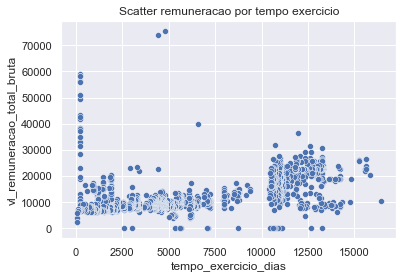

In [33]:
plot = sns.scatterplot(x=df_sem_auditor['tempo_exercicio_dias'],
                y=df_sem_auditor['vl_remuneracao_total_bruta'])
plot.set_title(label='Scatter remuneracao por tempo exercicio')

In [34]:
df_cluster = df_sem_auditor[['tempo_exercicio_dias_padro', 'vl_remuneracao_total_bruta_padro']].copy()

In [35]:
hierarchical_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [36]:
hierarchical_cluster.fit(df_cluster)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

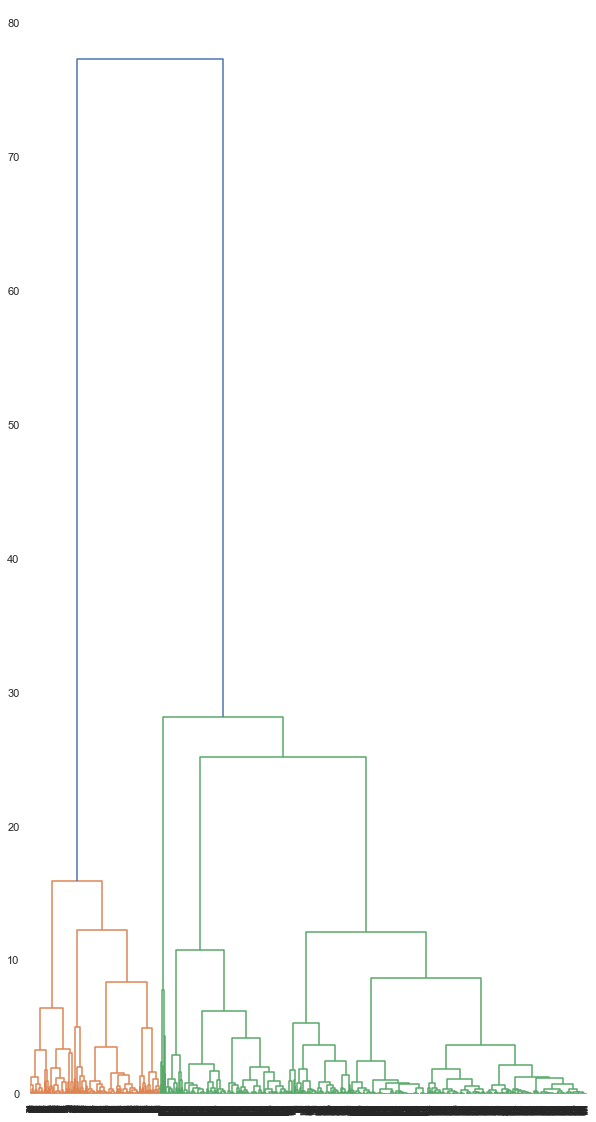

In [37]:
dendograma = plot_dendrogram(hierarchical_cluster)

In [38]:
Ks = list(range(1, 15))
km = {i:KMeans(n_clusters=i, random_state=42) for i in Ks}
score = {i:km[i].fit(df_cluster).score(df_cluster) for i in km}

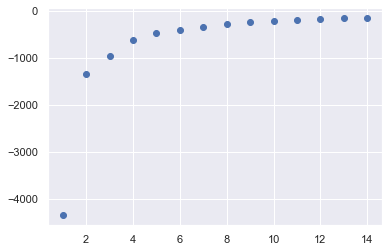

In [39]:
plt.plot(score.keys(), score.values(), 'bo')

4 e 2 clusters é o ideal!

In [40]:
df_sem_auditor['k_means2'] = km[2].labels_
df_sem_auditor['k_means4'] = km[4].labels_

Text(0.5, 1.0, 'K-means 2 remuneracao por tempo exercicio')

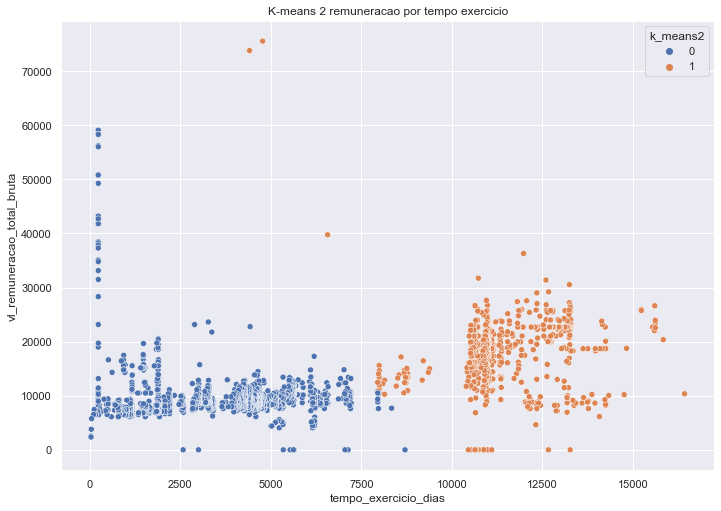

In [41]:
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(data=df_sem_auditor, x='tempo_exercicio_dias',
                y='vl_remuneracao_total_bruta', hue = 'k_means2')
plot.set_title(label='K-means 2 remuneracao por tempo exercicio')

Text(0.5, 1.0, 'K-means 4 remuneracao por tempo exercicio')

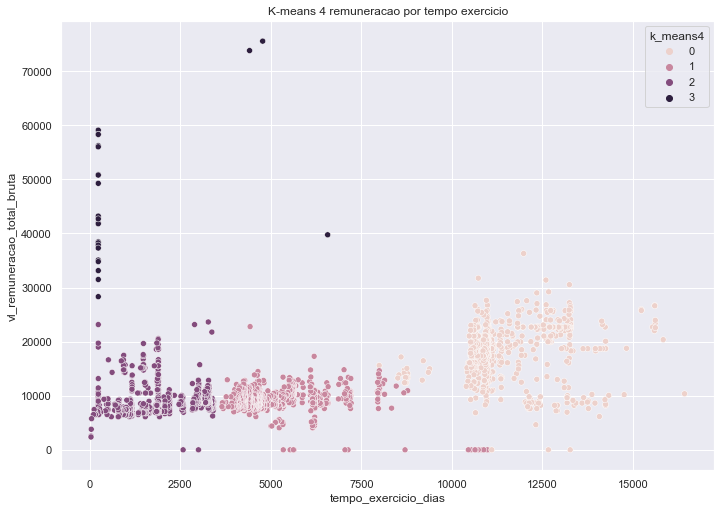

In [42]:
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(data=df_sem_auditor, x='tempo_exercicio_dias',
                y='vl_remuneracao_total_bruta', hue = 'k_means4')
plot.set_title(label='K-means 4 remuneracao por tempo exercicio')

In [43]:
plot.get_figure().savefig('k_means_remuneracao_tempo_servico2.png')

In [44]:
dist_clusters = pd.crosstab(df_sem_auditor['dc_cargo_base'], 
                            df_sem_auditor['k_means4']).apply(lambda r: round(
                                                                            r/r.sum(),2)*100, axis=1).rename({0:'% 0',
                                                                                                            1:'% 1',
                                                                                                            2:'% 2'},axis=1)

In [45]:
dist_clusters

k_means4,% 0,% 1,% 2,3
dc_cargo_base,,,,
ANALISTA,100.0,0.0,0.0,0.0
ANALISTA ASSIST DESENV SOCIAL EQUIP SOCIAL,0.0,79.0,7.0,14.0
ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,13.0,48.0,37.0,2.0
ANALISTA DE INFORMACOES CULTURA E DESPORTO,7.0,67.0,26.0,0.0
ANALISTA DE MEIO AMBIENTE,0.0,100.0,0.0,0.0
ANALISTA DE ORDENAMENTO TERRITORIAL,98.0,2.0,0.0,0.0
ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL,35.0,20.0,45.0,0.0
ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,0.0,0.0,100.0,0.0
ARQUITETO,100.0,0.0,0.0,0.0


In [46]:
df_sem_auditor[df_sem_auditor['k_means4']==3].sample(2)

,registro_funcional,num_vinculo,dc_cargo_base,grupo_cargo_base,nivel_cargo_base,segmento_cargo_base,referencia_cargo_comissao,relacao_juridica,qt_hora_jornada_semanal,dc_orgao,...,pessoa_com_deficiencia,vl_remuneracao_base_mensal,vl_outro_elemento_remuneracao,vl_remuneracao_total_bruta,cedido,tempo_exercicio_dias,tempo_exercicio_dias_padro,vl_remuneracao_total_bruta_padro,k_means2,k_means4
2510,8328595,2,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,QAA,II,SERVICO SOCIAL,NaN,EFETIVO,30,SECRETARIA MUNICIPAL DA SAUDE,...,NAO,8545.33,29299.55,37844.88,False,230,-1.430922,2.472547,0,3
2508,8326142,2,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,QAA,I,SERVICO SOCIAL,NaN,EFETIVO,30,SECRETARIA MUNICIPAL DA SAUDE,...,NAO,7102.61,31155.07,38257.68,False,230,-1.430922,2.516431,0,3


In [47]:
dados_cadastrais = pd.read_csv('original_data/aggregated/cadastro_servidores_ativos_jul_2021.csv', sep=';')

In [48]:
dados_cadastrais[dados_cadastrais['REGISTRO']==8343152]

,REGISTRO,VINCULO,NOME,CARGO_BASICO,REF_CARGO_BAS,SEGMENTO,GRUPO,SUBGRUPO,ESCOL_CARGO_BASICO,CARGO_COMISSAO,...,ESCOL_CARGO_COMISSAO,DATA_INICIO_EXERC,REL_JUR_ADM,SECRET_SUBPREF,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE
103452,8343152,2,RAQUEL ELFENSTEINS BUENO,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL NI...,Q9,SERVICO SOCIAL,QAA,SUPERIOR,SUPERIOR COMPLETO,NaN,...,NaN,01/01/2021,EFETIVO,SECRETARIA MUNICIPAL DA SAUDE,HM PROFESSOR MARIO DEGNI,NaN,F,1956,BRANCA,NAO


In [49]:
dados_cadastrais[dados_cadastrais['REGISTRO']==7750617]

,REGISTRO,VINCULO,NOME,CARGO_BASICO,REF_CARGO_BAS,SEGMENTO,GRUPO,SUBGRUPO,ESCOL_CARGO_BASICO,CARGO_COMISSAO,...,ESCOL_CARGO_COMISSAO,DATA_INICIO_EXERC,REL_JUR_ADM,SECRET_SUBPREF,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE
63144,7750617,1,FERNANDA DE OLIVEIRA FURINO,ANALISTA DE INFORMACOES CULTURA E DESPORTO NIV...,Q6,BIBLIOTECONOMIA,QAA,SUPERIOR,SUPERIOR COMPLETO,NaN,...,NaN,25/07/2008,EFETIVO,SECRETARIA MUNICIPAL DE EDUCACAO,CEU FORMOSA - PROFESSOR EDEN SILVERIO DE OLIVEIRA,NaN,F,1962,NAO INFORMADO,NAO


Provavelmente houve o pagamento de algum processo etc. à Prefeitura para essas carreiras no mês de julho. Praticamente todos os restantes pertencem ao mesmo quadro.

In [50]:
df_sem_auditor[df_sem_auditor['k_means4']==3]['grupo_cargo_base'].value_counts()

QAA     24
QEAG     1
Name: grupo_cargo_base, dtype: int64

Vamos remover esse grupo e salvar o dataframe para fazermos o modelo de regressão

In [51]:
df_final = df_sem_auditor[df_sem_auditor['k_means4']!=3].copy().reset_index(drop=True)

In [52]:
#dropando os clusters anteriores
df_final.drop(['k_means2', 'k_means4'],axis=1, inplace=True)

In [53]:
df_cluster = df_final[['tempo_exercicio_dias_padro', 'vl_remuneracao_total_bruta_padro']].copy()

In [54]:
hierarchical_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [55]:
hierarchical_cluster.fit(df_cluster)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

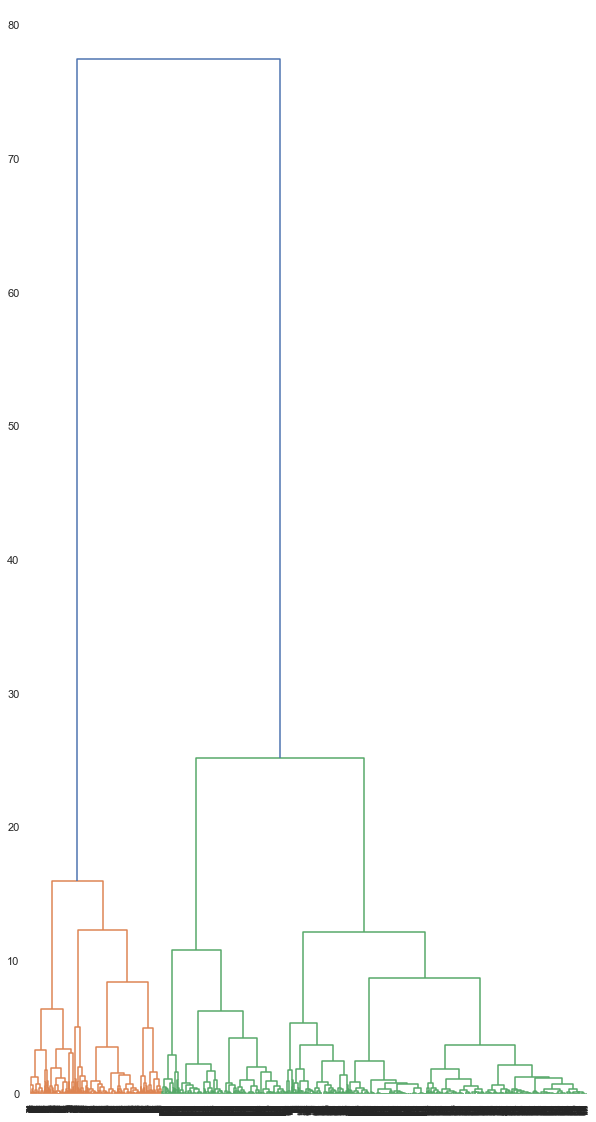

In [56]:
dendograma = plot_dendrogram(hierarchical_cluster)

In [57]:
Ks = list(range(1, 15))
km = {i:KMeans(n_clusters=i, random_state=42) for i in Ks}
score = {i:km[i].fit(df_cluster).score(df_cluster) for i in km}

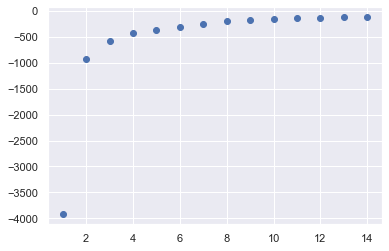

In [58]:
plt.plot(score.keys(), score.values(), 'bo')

In [59]:
df_final['k_means4'] = km[4].labels_

Text(0.5, 1.0, 'K-means 4 remuneracao por tempo exercicio')

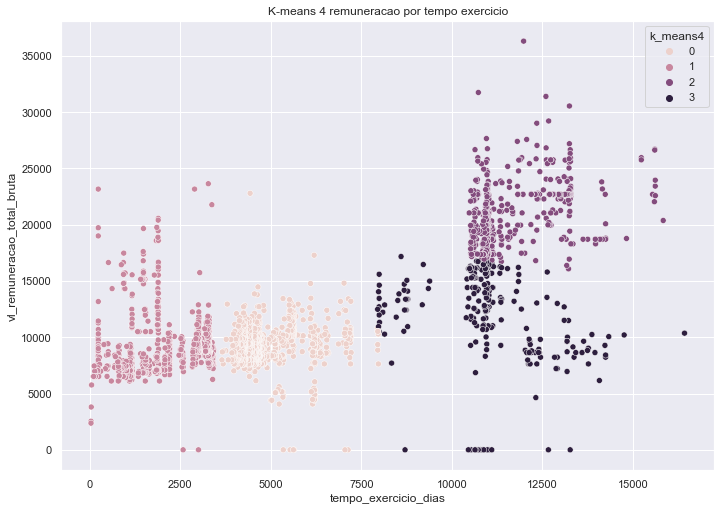

In [60]:
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(data=df_final, x='tempo_exercicio_dias',
                y='vl_remuneracao_total_bruta', hue = 'k_means4')
plot.set_title(label='K-means 4 remuneracao por tempo exercicio')

In [61]:
dist_clusters = pd.crosstab(df_final['dc_cargo_base'], 
                            df_final['k_means4']).apply(lambda r: round(
                                                                            r/r.sum(),2)*100, axis=1).rename({0:'% 0',
                                                                                                            1:'% 1',
                                                                                                            2:'% 2'},axis=1)

In [62]:
dist_clusters

k_means4,% 0,% 1,% 2,3
dc_cargo_base,,,,
ANALISTA,0.0,0.0,0.0,100.0
ANALISTA ASSIST DESENV SOCIAL EQUIP SOCIAL,50.0,8.0,0.0,42.0
ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,49.0,38.0,8.0,5.0
ANALISTA DE INFORMACOES CULTURA E DESPORTO,67.0,26.0,4.0,3.0
ANALISTA DE MEIO AMBIENTE,100.0,0.0,0.0,0.0
ANALISTA DE ORDENAMENTO TERRITORIAL,0.0,0.0,57.0,43.0
ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL,13.0,45.0,19.0,23.0
ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,0.0,100.0,0.0,0.0
ARQUITETO,0.0,0.0,50.0,50.0


In [63]:
df_final.to_csv('project_data/remuneracao_quadros_tecnicos_modelagem.csv')